# Infer model

In [1]:
import os
import sys

import cv2
from matplotlib import pyplot as plt

# To add src to the path so that we can import modules
current_directory = os.getcwd()
if not current_directory.endswith("emotion_recognition"):
    sys.path.append(os.path.join(current_directory, 'emotion_recognition'))

try:
    from src import INFERENCE_DIR
    from src.models.predict_model import *
    import src.visualization.visualize as vis
except ModuleNotFoundError:
    print("Ensure that src is added to PATH and restart the kernel")
    print(sys.path)



First load the models

In [2]:
face_model, emotion_model, face_transforms, device = load_models("iconic-sweep-19", face_detector_size = "medium")

wandb: Currently logged in as: armand-07. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /home/usuaris/imatge/armand.de.asis/.netrc


Using trained model: iconic-sweep-19


wandb: Downloading large artifact model_iconic-sweep-19:latest, 90.04MB. 2 files... 
wandb:   2 of 2 files downloaded.  
Done. 0:0:0.4


Artifact downloaded to: /home/usuaris/imatge/armand.de.asis/artifacts/model_iconic-sweep-19:v0
Using CUDA with 1 GPUs
Using CUDA device:NVIDIA GeForce GTX 1080 Ti
Creating model with architecture: resnet50
Using pre-trained weights: False
Using custom weights of type <class 'collections.OrderedDict'>: 


Time to detect faces: 1.6135187149047852
Number of faces detected: 24
['Neutral', 'Happy', 'Surprise', 'Neutral', 'Disgust', 'Surprise', 'Surprise', 'Neutral', 'Neutral', 'Surprise', 'Neutral', 'Surprise', 'Neutral', 'Fear', 'Neutral', 'Happy', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Anger', 'Fear', 'Neutral']
Time to predict emotions: 0.10465168952941895
Time to plot: 0.0051381587982177734
Total time: 1.7237379550933838


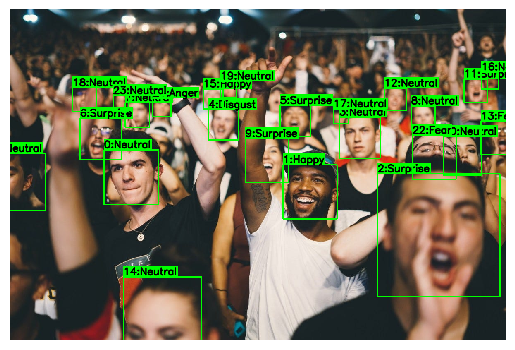

Time to detect faces: 0.07386088371276855
Number of faces detected: 11
['Surprise', 'Anger', 'Disgust', 'Anger', 'Neutral', 'Neutral', 'Anger', 'Anger', 'Neutral', 'Anger', 'Anger']
Time to predict emotions: 0.05437874794006348
Time to plot: 0.0005767345428466797
Total time: 0.1292130947113037


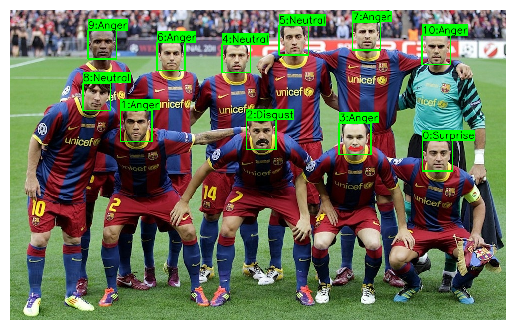

Time to detect faces: 0.02629709243774414
Number of faces detected: 11
['Surprise', 'Anger', 'Neutral', 'Anger', 'Neutral', 'Neutral', 'Anger', 'Anger', 'Neutral', 'Anger', 'Anger']
Time to predict emotions: 0.034159183502197266
Time to plot: 0.000438690185546875
Total time: 0.06126904487609863


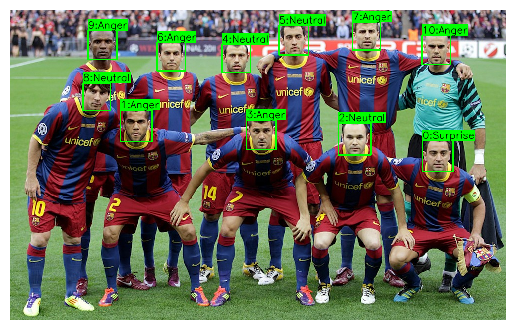

Time to detect faces: 0.027858972549438477
Number of faces detected: 41
['Anger', 'Anger', 'Happy', 'Anger', 'Disgust', 'Anger', 'Anger', 'Anger', 'Anger', 'Anger', 'Anger', 'Anger', 'Anger', 'Anger', 'Anger', 'Anger', 'Anger', 'Anger', 'Anger', 'Anger', 'Anger', 'Surprise', 'Sad', 'Neutral', 'Anger', 'Sad', 'Neutral', 'Fear', 'Neutral', 'Anger', 'Fear', 'Anger', 'Anger', 'Neutral', 'Fear', 'Anger', 'Anger', 'Anger', 'Neutral', 'Neutral', 'Neutral']
Time to predict emotions: 0.1203150749206543
Time to plot: 0.001764059066772461
Total time: 0.15029144287109375


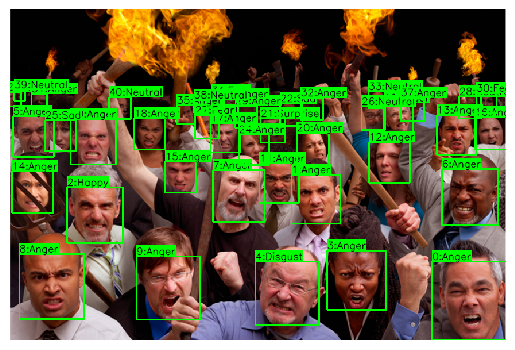

Time to detect faces: 0.02641010284423828
Number of faces detected: 11
['Surprise', 'Neutral', 'Anger', 'Neutral', 'Anger', 'Anger', 'Neutral', 'Anger', 'Neutral', 'Anger', 'Anger']
Time to predict emotions: 0.03294682502746582
Time to plot: 0.0005412101745605469
Total time: 0.060318708419799805


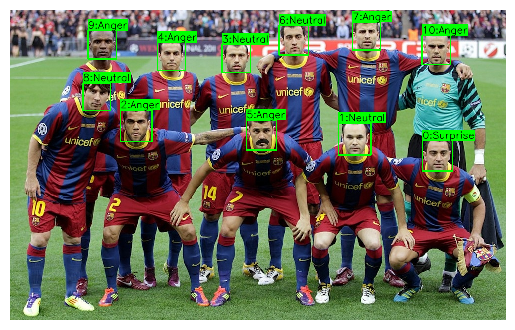

In [3]:
images = ['test1.jpg', 'test2.jpg', 'test3.jpg', 'image001.jpg']
dir = os.path.join(INFERENCE_DIR, 'test')
images = os.listdir(dir)
for image in images:
    path = os.path.join(dir, image)
    if not os.path.exists(path):
        raise FileNotFoundError(f"File {path} not found")
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = infer_image_debug(img, face_model, emotion_model, device, face_transforms)
    plt.imshow(img, interpolation='nearest')
    plt.axis('off')
    plt.show()

Test each face batch:

Number of faces detected: 24


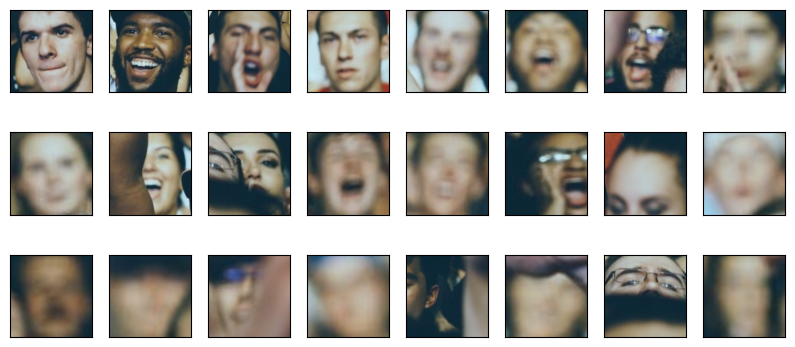

In [5]:
dir = os.path.join(INFERENCE_DIR, 'test')
img = cv2.imread(os.path.join(dir, 'test4.jpg'))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
[faces_bbox_YOLO, confidence_YOLO] = detect_faces_YOLO(img, face_model, format = 'xywh-center')
filtered_faces = faces_bbox_YOLO[confidence_YOLO > 0.5]
filtered_faces = transform_bbox_to_square(filtered_faces)
print (f"Number of faces detected: {len(filtered_faces)}")
if len(filtered_faces) != 0:
    start_detect_emotions = time.time()
    face_batch = create_faces_batch(img, face_transforms, filtered_faces, device)
    face_batch.cpu()
vis.visualize_batch(face_batch.to('cpu'), adjust_to_vis_range = True)